# Exercises - Week 1 - Introduction
#### Simon Lee, BIO-322, Machine Learning for Bioengineers, Winter 2022

#### Exercise 1
Create a data frame with 3 columns named A, B and C.
   1. Column A contains 5 random numbers sampled from a Bernoulli distribution with rate 0.3, column B contains 5 random numbers from the uniform distribution over the interval [0, 1), and column C contains 5 samples from the set `(:hip, :hop)`.
   2. Create a vector whose i'th element contains the sum of the i'th entries of columns A and B of the data frame created in 1.
   3. Select all rows with `:hop` in column C and display the resulting data frame.

In [1]:
begin
	# code for excercise 1
	using DataFrames
	using Distributions
	#Importing distributions
	bernoulli = Binomial(1,0.3)
	uniform  = Uniform(0, 1)
	# Constructing dataframe - part 1 
	df = DataFrame(A = rand(bernoulli, 5),
	               B = rand(uniform, 5),
				   C = rand((:hip, :hop), 5)
	)
end

,A,B,C
,Int64,Float64,Symbol
1,0,0.158567,hip
2,0,0.849071,hip
3,0,0.0957341,hop
4,1,0.339603,hop
5,0,0.831963,hop


In [2]:
begin
	#Create a vector whose i'th element contains the sum of the i'th entries of columns A and B of the data frame created in 1.
	df[!,:D] = df.A + df.B
	df
end

,A,B,C,D
,Int64,Float64,Symbol,Float64
1,0,0.158567,hip,0.158567
2,0,0.849071,hip,0.849071
3,0,0.0957341,hop,0.0957341
4,1,0.339603,hop,1.3396
5,0,0.831963,hop,0.831963


In [3]:
# Select all rows with :hop in column C and display the resulting data frame.
filter(row -> row.C == :hop, df)

,A,B,C,D
,Int64,Float64,Symbol,Float64
1,0,0.0957341,hop,0.0957341
2,1,0.339603,hop,1.3396
3,0,0.831963,hop,0.831963


#### Exercise 2
   Very often the first version of some code does not run as it should. Therefore we need good debugging strategies. For this it is important to know how to read error messages. In this exercise we will produce different error messages and try to interpret them.
   1. Write `longfunc(1, [1, 2, 3])` in a new cell and read the error message. At the bottom of this error message you can see where the error occurred. You can click on the yellowish field with text `Other: 2` to jump to the relevant code. Based on this you should know now that `x = 1` and `y = [1, 2, 3]` are tried to be added in `longfunc`. Let us now look at the first line of the error message: it says `no method matching +(::Int64, ::Vector{Int64})`, which means that Julia doesn't know how to add the integer `x = 1` to the vector `y = [1, 2, 3]`. Now there are multiple ways to fix the error, depending on what you want. If you wanted to add `1` to every element of the vector, you could modify `longfunc` such that `tmp = x .+ y`. Try this fix. You will run into another error. Can you also fix the next error?
   2. Create a cell with content `A = []`, another cell with `mean(x) = sum(x)/length(x)`, and a third cell with content `mean(A)`. This produces a scary error message :). Usually you can ignore all the lines that do not have a link to jump to some code (e.g. you can ignore the line `1. zero(::Type{Any})` etc.; it is telling you that the error occurred somewhere in the `zero` function which is a builtin function of Julia). What matters is the line `mean(::Vector{Any})` which tells you that you called the function `mean` with a vector of type `Any` (this is the type of the empty vector `A = []`). You can get rid of the error by changing e.g. `A = [1, 2, 3]`.
   3. Create a cell with content `f(x) = longfunc(x)` and another one with content `f([2, 3])`. This produces another commonly occuring error message, including a hint about closest alternatives. If you carefully look at the error message `longfunc(::Any, !Matched::Any)` you see that the function `longfunc` did not get a second argument (this is the meaning of `!Matched`). You can fix this e.g. with `f(x) = longfunc(x[1], x[2])`.
   4. By now you should be (close to) a debugging wizzard and you can find fixes to all bugs in the following lines of code (copy them over to a new cell). The goal is just to have something that runs without errors; the result does not need to be meaningful :) *Hint:* Click on the topmost clickalble link in the error messages to jump to the line of code that creates the error.
```julia
begin
   function full_of_bugs(x)
       tmp = [myfunc(3); x]
       tmp2 = tmp^2
       tmp3 = tmp2 + log(sum(x))
       sqrt(tmp3 - length(x))
   end
   full_of_bugs([2, 1, -5])
end
```
"""

#### Exercise 3
The state of a Pluto notebook is usually consistent, because cells `B, C, …` that depend on a given cell `A` are reevaluated when the code or the result of cell `A` changes. However, there is one thing that can lead to unexpected behavior: functions that mutate their argument (for the afficionados, Julia uses an evaluation strategy called [call by sharing](https://en.wikipedia.org/wiki/Evaluation_strategy#Call_by_sharing)). Here is an example:
```julia
function multiply_by_two!(x)
    x .*= 2
end
```
1. Paste this function to a new cell.
2. In another new cell define `my_vector = [1, 2, 3, 4]`.
3. In the next cell run `multiply_by_two!(my_vector)`.
4. In the next cell run `my_vector` to simply show it's value.
5. Run the cell in step 3 multiple times. Does the cell in step 4 automatically show the updated value? What happens when you re-run the cell in step 4?
6. A related, somewhat unexpected behavior can be observed with pseudo-random-number generators. Paste the code `rng2 = MersenneTwister(123)` in a cell and in the next cell `rand(rng2)`. Run the second cell multiple times. What do you observe? What happens when you rerun the cell that defines the pseudo-random-number generator?
Remember, the exclamation mark at the end of the function name is a [convention in Julia](https://docs.julialang.org/en/v1/manual/style-guide/#bang-convention) to remind the programmer that the argument may change.

In [1]:
# In this example the vector 'my_vector' does not automatically update
function multiply_by_two!(x)
    x .*= 2
end

multiply_by_two! (generic function with 1 method)

In [2]:
my_vector = [1, 2, 3, 4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [ ]:
multiply_by_two!(my_vector)

In [ ]:
my_vector

In [ ]:
begin
    using Random
    rng2 = MersenneTwister(123)
    rand(rng2) 
end

#### Exercise 4
   1. Use comprehension (see "Vectors, Matrices, Arrays") to create a vector with all numbers of the form ``x^y`` with ``x=1, \ldots, 10``, ``y = 2, \ldots, 7`` and ``y > x``.
   2. Compute the sum of the square root of these numbers.
"""

In [3]:
comprehension = [ x^y for x=1:10 for y=2:7 if y>x ]

21-element Vector{Int64}:
      1
      1
      1
      1
      1
      1
      8
     16
     32
     64
      ⋮
    243
    729
   2187
   1024
   4096
  16384
  15625
  78125
 279936

#### Exercise 5
1. Write a function that returns the smallest entry of a vector (without using the built-in function `minimum`, `argmin` or `findmin`).
2. Test your function on a vector of 10 randomly sampled integers in the range 1 to 100.

In [4]:
# minimum function
function minimum!(vector)
	min = 101
	for i in range(1,10)
		if vector[i] < min
			min = vector[i]
		end
	end
	return min
end

minimum! (generic function with 1 method)

In [5]:
# generates random numbers within range
vec = rand((1:100), 10)

10-element Vector{Int64}:
 59
  4
 21
 64
 79
 48
 95
  2
 95
  1

In [6]:
minimum!(vec)

1

#### Exercise 6
   1. Plot the `cos` function on the interval 0 to 4π. Hint: type `\pi + [Tab]` to enter the symbol π. To learn how to place custom tick labels on the x-axis, type `xticks` in a cell and open the \"Live docs\" at the bottom-right.
   2. Add a scatter plot with 100 points whose ``x`` and ``y`` coordinates are randomly sampled from the interval ``[0, 1)`` on top of the figure with the cosine.

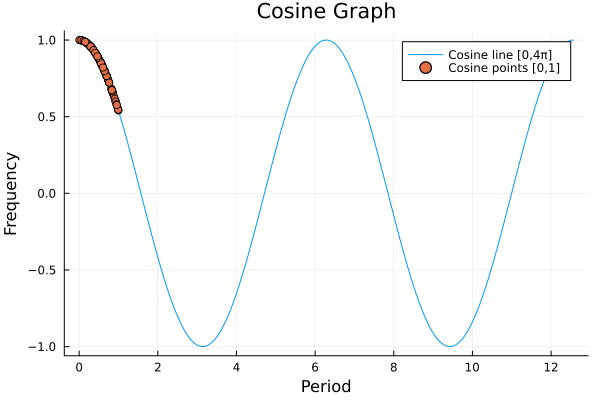

In [9]:
begin
	using Plots
	using Random
	rng = Xoshiro(123)
	x = rand(100)
	y = cos.(x)
	plot([cos], 0, 4π, labels = "Cosine line [0,4π]")
	scatter!(x,y, labels = "Cosine points [0,1]")
	plot!(title = "Cosine Graph", xlabel = "Period", ylabel = "Frequency")
end